In [3]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [4]:
import Data

data,sta,date,lon,lat,P,d,t,s,Tr,fluo,oxy_uM,oxy_mL,rho,isop,si,ti,NO3_1,NO3_2,PO3_1,PO3_2,SiO4_1,SiO4_2,nut = Data.AllData_variables()
PaThData,PaTh_sta,PaTh_lon,PaTh_lat,PaTh_t,PaTh_s,PaTh_rho,PaTh_d = Data.PaTh_variables()
listAllSta,listPaThSta,PaThDataSorted,PaThSort_sta,PaThSort_d,Pa,Th,PaTh,PaErr,ThErr,PaThErr = Data.PaTh_varSorted()

/home/mgrenier/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (0,10,24,26,27,28,29,30,31,32,33,34,35,37,38,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/ocean/mgrenier/geotraces/analysis-Melanie/notebooks/Geotraces2015data/DerivVar.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  isop = np.zeros((ydim,xdim))


354.0 13.0


/home/mgrenier/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2885: DtypeWarning: Columns (0,10,24,26,27,28,29,30,31,32,33,34,35,37,38,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


354.0 13.0
354.0 13.0


/home/mgrenier/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: DtypeWarning: Columns (0,10,24,26,27,28,29,30,31,32,33,34,35,37,38,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.


354.0 13.0


In [5]:
from __future__ import division, print_function

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.figure as mfig
import matplotlib.image as mpimg
#import seawater.gibbs as gsw

import netCDF4 as nc
import numpy as np
import scipy.io as sio
import pandas as pd
import pickle as pl
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

from salishsea_tools import nc_tools
from salishsea_tools import viz_tools
from salishsea_tools import  psu_tools

from matplotlib.pyplot import *
#from seabird.cnv import fCNV

from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [6]:
#dir()
#locals()
#globals()

In [7]:
'''
figx = pl.load(open('PaThStationsGreyPal_Map.pickle', 'rb'))
figx.show()
'''

"\nfigx = pl.load(open('PaThStationsGreyPal_Map.pickle', 'rb'))\nfigx.show()\n"

In [8]:
#im = plt.imread('/ocean/mgrenier/geotraces/research/Geotraces2015data/PaThStationsGreyPal_Map.png') #I want to add a pdf if possible!
#plt.imshow(im)

In [9]:
si,ti,isop
s.min(),s.max()
#clabel?
listPaThSta

['K1',
 'LS2',
 'BB1',
 'BB3',
 'BB2',
 'CB2',
 'CB3',
 'CB4',
 '308/CAA8',
 'KC 500-2007',
 'KC 2000-2007',
 'KC 2700-2007',
 'A01-95',
 'L1.1-2009',
 'L2-2009',
 'L3-2009',
 '2',
 '93']

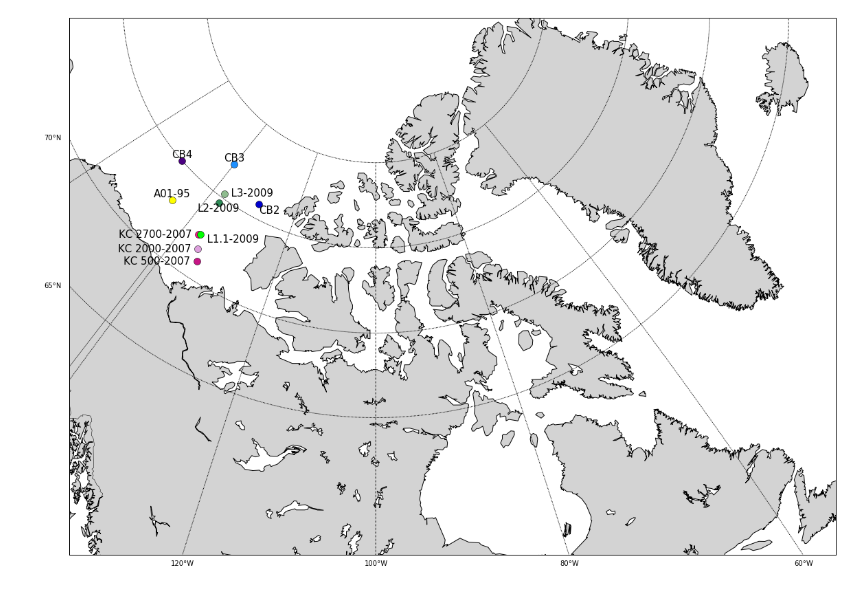

In [10]:
img1=mpimg.imread('/ocean/mgrenier/geotraces/analysis-Melanie/notebooks/Geotraces2015data/Figures/PaThStations-CBcompar_Map.png')
fig = plt.figure(figsize=(20, 10)) 
plt.imshow(img1);
plt.axis('off');

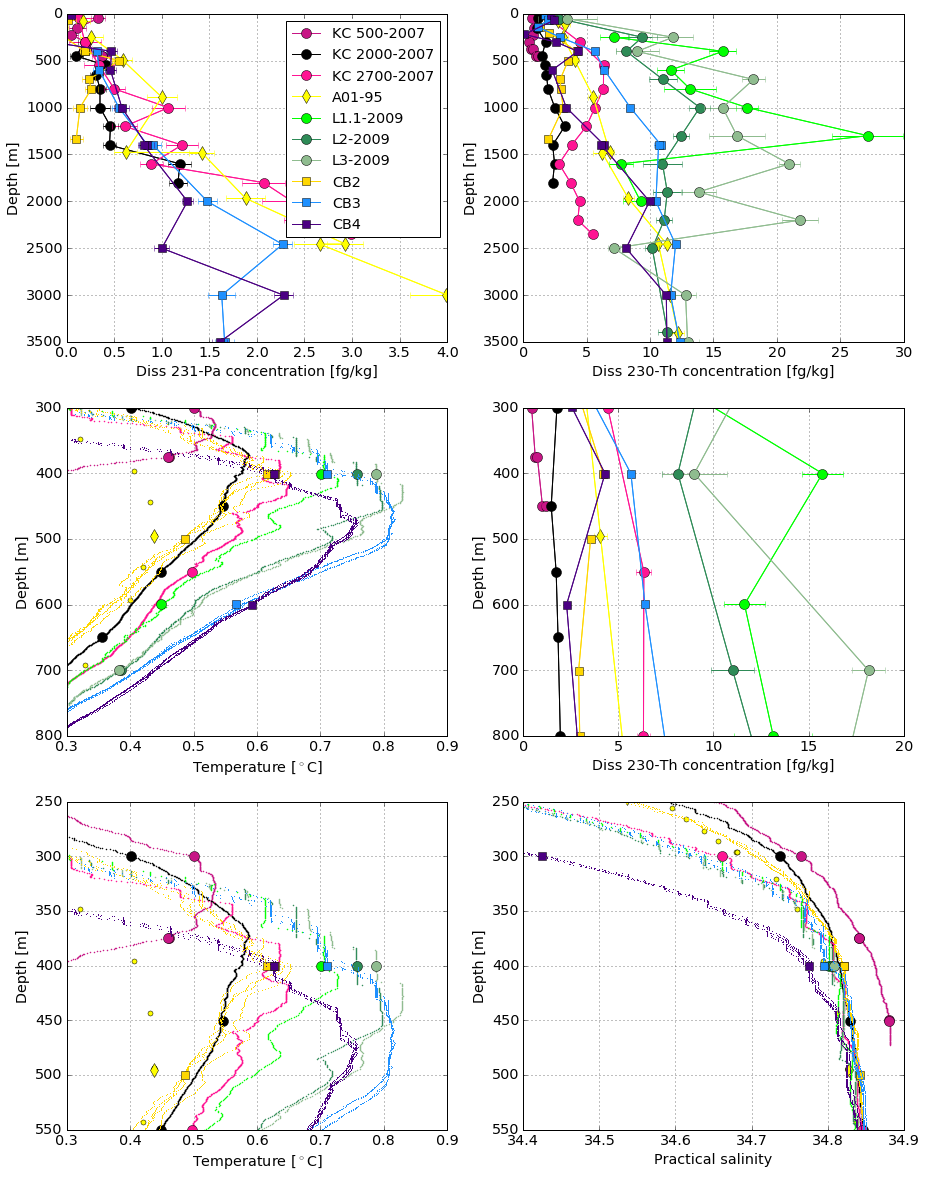

In [14]:
import matplotlib.pyplot as plt

fig,((ax1, ax2), (ax3, ax4), (ax5, ax6))=plt.subplots(3,2,facecolor='w',figsize=(15,20))


for station,Mt,St,Mtd,M,S,C in zip(('KC 500-2007', 'KC 2000-2007', 'KC 2700-2007', 'A01-95', 'L1.1-2009', 'L2-2009',
                          'L3-2009','CB2','CB3','CB4'),
                        ('.','.','.','o','.','.','.',',',',',','),(2,2,2,5,2,2,2,2,2,2),
                        ('o','o','o','d','o','o','o','s','s','s'),
                        ('o-','o-','o-','d-','o-','o-','o-','s-','s-','s-'),(10,10,10,10,10,10,10,8,8,8),
                        ('mediumvioletred','k','deeppink','yellow','lime','seagreen',
                        'darkseagreen','gold','dodgerblue','indigo')):
    
    for ax,xfield,yfield,xdata,ydata,xlabels,ylabels,xranges,yranges in zip((ax3,ax5,ax6),(t,t,s),
                                    (d,d,d),(PaTh_t,PaTh_t,PaTh_s),(PaTh_d,PaTh_d,PaTh_d),
                                    ('Temperature [$^\circ$C]','Temperature [$^\circ$C]',
                                     'Practical salinity'),
                                    ('Depth [m]','Depth [m]','Depth [m]'),
                                    ([0.3,0.9],[0.3, 0.9],[34.4, 34.9]),
                                    ([300,800],[250, 550],[250, 550])):
        ax.plot(xfield[sta == station],yfield[sta == station],Mt,markersize=St,color=C,label=station)
        ax.plot(xdata[sta == station],ydata[sta == station],Mtd,markersize=S,color=C,label=station)
        ax.set_xlim(xranges)
        ax.set_ylim(yranges)
        ax.set_xlabel(xlabels)
        ax.set_ylabel(ylabels)
        ax.invert_yaxis()

        
    for ax,xfield,yfield,XERR,xlabels,ylabels,xranges,yranges in zip((ax1,ax2,ax4),(Pa,Th,Th),
                                    (PaThSort_d,PaThSort_d,PaThSort_d),
                                    (PaErr,ThErr,ThErr),
                                    ('Diss 231-Pa concentration [fg/kg]','Diss 230-Th concentration [fg/kg]',
                                     'Diss 230-Th concentration [fg/kg]'),
                                    ('Depth [m]','Depth [m]','Depth [m]'),
                                    ([0,4],[0, 30],[0, 20]),
                                    ([0,3500],[0, 3500],[300, 800])):
        ax.plot(xfield[sta == station],yfield[sta == station],M,markersize=S,color=C,label=station)
        ax.errorbar(xfield[sta == station],yfield[sta == station],
                     xerr=XERR[PaThSort_sta == station].tolist(),color=C)
        ax.set_xlim(xranges)
        ax.set_ylim(yranges)
        ax.set_xlabel(xlabels)
        ax.set_ylabel(ylabels)
        ax.invert_yaxis()


for ax, in zip((ax1,ax2,ax3,ax4,ax5,ax6)):
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    ax.set_axisbelow(True)

handles, labels = ax1.get_legend_handles_labels()

ax1.legend(handles[0:10],labels[0:10],loc='best',numpoints=1,framealpha=1,frameon=True)
#ax3.add_artist(CTD[0,2,4,6,8,10,12,14,16,18])

savefig('Figures/PaThStations_Pa-Th-T-S-vsd_zoomAW-color.png',bbox_inches='tight')

plt.show()


In [15]:
'''handles, labels = ax1.get_legend_handles_labels()
len(handles)
labels[9:18],handles[9:18]
'''
#labelsP[1],handlesP[1];

'handles, labels = ax1.get_legend_handles_labels()\nlen(handles)\nlabels[9:18],handles[9:18]\n'

In [ ]:
PaThSort_d[sta == 'CB3'],PaTh_t[sta == 'CB3']

In [ ]:
fig,ax=plt.subplots(1,1,facecolor='w',figsize=(10,10))
x=100000
m = Basemap(llcrnrx=-20*x, llcrnry=-20*x, urcrnrx=+30*x, urcrnry=+15*x,lon_0=-100, lat_0=75,projection='ortho',resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgrey')
#m.bluemarble()

m.drawmeridians(np.arange(-160,-50,20), labels=[0,0,0,1])
m.drawparallels(np.arange(65,85,5), labels=[1,0,0,0])

currentStation=[]
previousStation=currentStation

for i in range(0,len(lon),1):
    longi,lati= m(lon[i],lat[i])
    if data.Pa[i] >= 0: 
        # print(data.Station[i])
        currentStation=sta[i]
        
        if currentStation != previousStation: 
            previousStation=currentStation
            if (currentStation == 'K1' or currentStation == 'LS2' or currentStation == '308/CAA8'):
                plt.plot(longi,lati,'o',color='k')
                ax.annotate(' '+sta[i],xy=(longi,lati),fontsize=15)
            if (currentStation == 'BB1'):
                plt.plot(longi,lati,'o',color='0.75')
                ax.annotate(' '+sta[i],xy=(longi,lati),verticalalignment='top',fontsize=15)
            if (currentStation == 'BB2' or currentStation == 'BB3'):
                plt.plot(longi,lati,'o',color='0.75')
                ax.annotate(' '+sta[i],xy=(longi,lati),fontsize=15)
            if (currentStation == 'CB2' or currentStation == 'CB3' or currentStation == 'CB4'):
                plt.plot(longi,lati,'o',color='0.5')
                #ax.annotate(' '+data.Station[i]+'\n',xy=(longi,lati),verticalalignment='bottom',fontsize=15)
                ax.annotate(sta[i],xy=(longi,lati),verticalalignment='bottom',fontsize=15)
    if (sta[i] == 'CAA1'):
        plt.plot(longi,lati,'o',color='red')
   #     ax.annotate(data.Station[i],xy=(longi,lati),verticalalignment='bottom',fontsize=15)
    if (sta[i] == 'CAA2'):
        plt.plot(longi,lati,'o',color='green')
  #      ax.annotate(data.Station[i],xy=(longi,lati),verticalalignment='bottom',fontsize=15)
    if (sta[i] == 'CAA3'):
        plt.plot(longi,lati,'o',color='blue')
  #      ax.annotate(data.Station[i],xy=(longi,lati),verticalalignment='bottom',fontsize=15)
    if (sta[i] == 'CAA4'):
        plt.plot(longi,lati,'o',color='yellow')
   #     ax.annotate(data.Station[i],xy=(longi,lati),verticalalignment='bottom',fontsize=15)

savefig('Figures/PaThStationsGreyPalPlusCAA1234_Map.png',bbox_inches='tight')


fig,((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7,ax8))=plt.subplots(4,2,facecolor='w',figsize=(15,20))

for station,M,S,C in zip(('K1','LS2','BB1','BB2','BB3','CB2','CB3','CB4'),
                        ('.',',','.','.',',','.',',','.'),
                        (4,1,2,4,1,2,1,4),('0','0','0.75','0.75','0.75','0.5','0.5','0.5')):
    for ax,xfield,yfield,xlabels,ylabels,xranges,yranges in zip((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8),(t,s,t,s,t,s,t,s),
                                    (d,d,d,d,d,d,rho,t),
                                    ('Temperature [$^\circ$C]','Practical salinity','Temperature [$^\circ$C]','Practical salinity','Temperature [$^\circ$C]','Practical salinity','Temperature [$^\circ$C]','Practical salinity'),
                                    ('Depth [m]','Depth [m]','Depth [m]','Depth [m]','Depth [m]','Depth [m]','Density [kg m-3]','Temperature [$^\circ$C]'),
                                    ([-2,8],[24, 36],[-2,8],[24, 36],[-2,8],[24, 36],[-2,8],[24, 36]),
                                    ([0,300],[0, 300],[300,1000],[300, 1000],[1000,3000],[1000, 3000],[20,28],[-2, 8])):
        ax.plot(xfield[sta == station],yfield[sta == station],M,markersize=S,color=C,label=station)
        ax.set_xlim(xranges)
        ax.set_ylim(yranges)
        ax.set_xlabel(xlabels)
        ax.set_ylabel(ylabels)
        ax.invert_yaxis()
    
'''ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax4.set_yscale('log')'''

for station,C in zip(('CAA1','CAA2','CAA3','CAA4'),('red','green','blue','yellow')):
    for ax,xfield in zip((ax1,ax2,ax3,ax4),(t,s,t,s)):
        ax.plot(xfield[sta == station],d[sta == station],',',color=C,label=station)

#ax3.legend(numpoints=10)
CTD=ax3.legend(numpoints=10,framealpha=1)
ax8.invert_yaxis()



# Plot Pa/Th samples on hydrological profiles


for station,M,S,C in zip(('K1','LS2','BB1','BB2','BB3','CB2','CB3','CB4'),
                        ('o','d','o','d','s','o','d','s'),
                        (10,10,10,10,10,10,10,10),('0','0','0.75','0.75','0.75','0.5','0.5','0.5')):
    for ax,xfield,yfield in zip((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8),
                                    (PaTh_t,PaTh_s,PaTh_t,PaTh_s,PaTh_t,PaTh_s,PaTh_t,PaTh_s),
                                    (PaTh_d,PaTh_d,PaTh_d,PaTh_d,PaTh_d,PaTh_d,PaTh_rho,PaTh_t),
                                    ):
     
        ax.plot(xfield[sta == station],yfield[sta == station],M,markersize=S,color=C,label=station)


# Water mass identification
# 0-300 m
PML = data[(sta == 'CB3') & (PaTh_d > 5) & (PaTh_d < 25)] # Polar Mixed Layer
ArcW = data[(sta == 'BB2') & (data.Cast == 18.0) & (data.P == 150)] # Arctic Water
UHL = data[(sta == 'CB3') & (PaTh_d > 120) & (PaTh_d < 150)] # Lower Halocline Layer
LHL = data[(sta == 'CB3') & (PaTh_d > 230) & (PaTh_d < 270)] # Lower Halocline Layer
# 300-1000 m
AW = data[(sta == 'CB2') & (PaTh_d > 450) & (PaTh_d < 550)] # Atlantic Water
WGIW = PaThData[(PaTh_sta == 'BB2') & (PaTh_d > 550) & (PaTh_d < 650)] # West Greenland Intermediate Water
# 1000-3000 m
DBBW = PaThData[(PaTh_sta == 'BB2') & (PaTh_d > 2000) & (PaTh_d < 2200)] #Deep Baffin Bay Water

# 0-300 m

for ax,xfield,yfield,pos in zip((ax1,ax2),(PML.temp,PML.sal),
                            (PML.d,PML.d),('left','center')
                            ):
    ax.annotate('PML \n\n',xy=(xfield,yfield),horizontalalignment=pos,verticalalignment='center',fontsize=15,color='0.5',fontweight='bold')

for ax,name,xfield,yfield,pos in zip((ax1,ax2),('ArcW','ArcW'),(ArcW.temp,ArcW.sal),
                            (ArcW.d,ArcW.d),('right','left')
                            ):
    ax.annotate(name,xy=(xfield,yfield),horizontalalignment=pos,fontsize=15,color='0.75',fontweight='bold')

for ax,name,xfield,yfield,pos in zip((ax1,ax2),('. UHL','UHL .'),(UHL.temp,UHL.sal),
                            (UHL.d,UHL.d),('left','right')
                            ):
    ax.annotate(name,xy=(xfield,yfield),horizontalalignment=pos,verticalalignment='center',fontsize=15,color='0.5',fontweight='bold')

for ax,name,xfield,yfield in zip((ax1,ax2),('LHL  \n','LHL\n'),(LHL.temp,LHL.sal),
                            (LHL.d,LHL.d)
                            ):
    ax.annotate(name,xy=(xfield,yfield),horizontalalignment='center',verticalalignment='center',fontsize=15,color='0.5',fontweight='bold')

# 300-1000 m

for ax,name,xfield,yfield,pos in zip((ax3,ax4),('AW .','. AW'),(AW.temp,AW.sal),
                            (AW.d,AW.d),('right','left')
                            ):
    ax.annotate(name,xy=(xfield,yfield),horizontalalignment=pos,fontsize=15,color='0.5',fontweight='bold')

for ax,name,xfield,yfield,pos in zip((ax3,ax4),('. WGIW','WGIW .'),(WGIW.temp,WGIW.sal),
                            (WGIW.d,WGIW.d),('left','right')
                            ):
    ax.annotate(name,xy=(xfield,yfield),horizontalalignment=pos,fontsize=15,color='0.75',fontweight='bold')

# 1000-3000 m

for ax,xfield,yfield in zip((ax5,ax6),
                            (DBBW.temp,DBBW.sal),
                            (DBBW.d,DBBW.d)
                            ):
    ax.annotate('DBBW .',xy=(xfield,yfield),horizontalalignment='right',fontsize=15,color='0.75',fontweight='bold')


for ax, in zip((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8)):
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    ax.set_axisbelow(True)

handles, labels = ax1.get_legend_handles_labels()

ax3.legend(handles[8:16],labels[8:16],loc='best',numpoints=1,framealpha=0,frameon=False)
ax3.add_artist(CTD)

#drawIsopycnals(nlevels = 6, levels, rotate = TRUE, rho1000 = FALSE,digits = 2, eos = getOption("oceEOS", default = "gsw"), cex = 0.75 * par("cex"), col = "darkgray", lwd = par("lwd"), lty = par("lty"))
savefig('Figures/PaThStationsPlusCAA1234_TandSvsd.png',bbox_inches='tight')

plt.show()

In [ ]:
### Draw the map for the location of the stations

#m = Basemap(llcrnrlon=-170, llcrnrlat=50, urcrnrlon=-40, urcrnrlat=85,lon_0=-100, resolution='l',area_thresh=10,projection='merc')
fig,ax=plt.subplots(1,1,facecolor='w',figsize=(10,10))
x=100000
m = Basemap(llcrnrx=-20*x, llcrnry=-20*x, urcrnrx=+30*x, urcrnry=+15*x,lon_0=-100, lat_0=75,projection='ortho',resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgrey')
#m.bluemarble()

m.drawmeridians(np.arange(-160,-50,20), labels=[0,0,0,1])
m.drawparallels(np.arange(65,85,5), labels=[1,0,0,0])

lon,lat= m(data.lon[0],data.lat[0])
lon2,lat2=m(data.lon[14250],data.lat[14250])
plt.plot(lon,lat,'o',color='red')
#plt.plot(lon2,lat2,'o',color='red')

stationList={}
for i in xrange(1,len(data.lon)-1,1):
    if data.Station[i] not in stationList:
        stationList.name=data.Station[i]
        stationList.lat=data.lat[i]
        stationList.lon=data.lon[i]
        stationList.pa=[]
        stationList.th=[]
        if data.pa[i] > 0:
            stationList.pa.append(data.pa[i])
        stationList.th
    else:
        #already exists
        
        
        
for i in range(1, len(stationList)):
    currentStation=data[data.Station == stationList[i]]
    longi,lati= m(currentStation.lon[1],currentStation.lat[1])
    plt.plot(longi,lati,'o',color='red')

    
        
'''j=0
data.Station[0]=0
currentStation=[]
previousStation=currentStation

for i in xrange(0,len(data.lon),1):
    longi,lati= m(data.lon[i],data.lat[i])
#    if data.Pa[i] >= 0:
    if data.Pa[i] >= 0: 
        # print(data.Station[i])
        currentStation=data.Station[i]
        
        if currentStation != previousStation: 
            previousStation=currentStation
            plt.plot(longi,lati,'o',color='yellow')
            ax.annotate(data.Station[i],xy=(longi,lati),horizontalalignment='left')'''
plt.show()
cmap = plt.get_cmap('jet')
